In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bigquery-geotab-intersection-congestion/sample_submission.csv
/kaggle/input/bigquery-geotab-intersection-congestion/submission_metric_map
/kaggle/input/bigquery-geotab-intersection-congestion/submission_metric_map.json
/kaggle/input/bigquery-geotab-intersection-congestion/train.csv
/kaggle/input/bigquery-geotab-intersection-congestion/test.csv
/kaggle/input/bigquery-geotab-intersection-congestion/BigQuery-Dataset-Access.md


1. read data
2. delete missing data

GOAL
각 row 별 Total Time 20,50,80/ Total Distance 20,50,80

TODO
1. 각 intersection 별

x=month,weekend,hour, Path,City
y = Total time~, Distance~


In [2]:
train = pd.read_csv("/kaggle/input/bigquery-geotab-intersection-congestion/train.csv")
sample = pd.read_csv("/kaggle/input/bigquery-geotab-intersection-congestion/sample_submission.csv")
print(train.shape)
train.head()

(856387, 28)


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Atlanta


In [3]:
num_feat = train.dtypes[train.dtypes != "object"].index
print("# of numerical features : ",len(num_feat))
print(train[num_feat].columns)

print("*"*50)

cat_feat = train.dtypes[train.dtypes == "object"].index
print("# of categorical featrues : ",len(cat_feat))
print(train[cat_feat].columns)

# of numerical features :  22
Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'Hour', 'Weekend',
       'Month', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80'],
      dtype='object')
**************************************************
# of categorical featrues :  6
Index(['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading',
       'Path', 'City'],
      dtype='object')


In [4]:
test = pd.read_csv("/kaggle/input/bigquery-geotab-intersection-congestion/test.csv")
print(test.shape)
test.head()

(1921357, 13)


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,City
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,Atlanta
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,Atlanta
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,Atlanta


In [5]:
test_tem = test.drop('RowId',axis=1)

In [6]:
test_tem.duplicated(test_tem.columns).sum()

0

In [7]:
test_tem.shape

(1921357, 12)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set()
#cols = [ 'Weekend','Month', 'TotalTimeStopped_p20',
#        'DistanceToFirstStop_p20', 'TotalTimeStopped_p40','DistanceToFirstStop_p40', 
#        'TotalTimeStopped_p50','DistanceToFirstStop_p50', 'TotalTimeStopped_p80',
#        'DistanceToFirstStop_p80']
#cols = train.columns
#sns.pairplot(train[cols],height = 2.5)
#plt.show();

In [9]:
test.isnull().sum()

RowId                  0
IntersectionId         0
Latitude               0
Longitude              0
EntryStreetName    19198
ExitStreetName     15587
EntryHeading           0
ExitHeading            0
Hour                   0
Weekend                0
Month                  0
Path                   0
City                   0
dtype: int64

In [10]:
#train = train.drop(train.loc[train['EntryStreetName'].isnull()].index)
#train = train.drop(train.loc[train['ExitStreetName'].isnull()].index)
#train.isnull().sum()


In [11]:
#test = test.drop(test.loc[test['EntryStreetName'].isnull()].index)
#test = test.drop(test.loc[test['ExitStreetName'].isnull()].index)
#test.isnull().sum()

In [12]:
train.shape,test.shape

((856387, 28), (1921357, 13))

In [13]:
one_hot = pd.get_dummies(train['City'])
train = train.drop('City',axis = 1)
train = train.join(one_hot)
train.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,Atlanta,Boston,Chicago,Philadelphia
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


In [14]:
one_hot = pd.get_dummies(test['City'])
test = test.drop('City',axis = 1)
test = test.join(one_hot)
test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,Atlanta,Boston,Chicago,Philadelphia
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,1,0,0,0
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,1,0,0,0
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,1,0,0,0
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,1,0,0,0
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,1,0,0,0


In [15]:
train=train.sort_values(by=['RowId'])
train

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,Atlanta,Boston,Chicago,Philadelphia
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856382,2777739,1990,39.938232,-75.149930,South 4th Street,Catharine Street,S,W,17,1,...,55.0,0.0,0.0,0.0,0.0,75.5,0,0,0,1
856383,2777740,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,18,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856384,2777741,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,19,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1
856385,2777742,1990,39.938232,-75.149930,Catharine Street,Catharine Street,W,W,20,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1


In [16]:
test=test.sort_values(by=['RowId'])
test

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,Atlanta,Boston,Chicago,Philadelphia
0,0,1,33.750940,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,1,0,0,0
1,1,1,33.750940,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,SW,SE,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,1,0,0,0
2,2,1,33.750940,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,1,0,0,0
3,3,1,33.750940,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,NE,NE,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,1,0,0,0
4,4,1,33.750940,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,SW,SW,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1921352,1921352,1990,39.938232,-75.149930,South 4th Street,Catharine Street,S,W,20,1,12,South 4th Street_S_Catharine Street_W,0,0,0,1
1921353,1921353,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,20,1,12,South 4th Street_S_South 4th Street_S,0,0,0,1
1921354,1921354,1990,39.938232,-75.149930,South 4th Street,Catharine Street,S,W,21,1,12,South 4th Street_S_Catharine Street_W,0,0,0,1
1921355,1921355,1990,39.938232,-75.149930,South 4th Street,South 4th Street,S,S,21,1,12,South 4th Street_S_South 4th Street_S,0,0,0,1


In [17]:
#hour, month, weekend가 얼마나 영향을 줬는지 살펴보자
#sns.set()
#cols = [ 'Weekend', 'TotalTimeStopped_p20',
#        'DistanceToFirstStop_p20', 'TotalTimeStopped_p40','DistanceToFirstStop_p40', 
#        'TotalTimeStopped_p50','DistanceToFirstStop_p50', 'TotalTimeStopped_p80',
#        'DistanceToFirstStop_p80']
#cols = train.columns
#temp = train[train['Path']=='South 4th Street_S_South 4th Street_S']
#print(temp.shape)
#sns.pairplot(temp[cols],height = 2.5)
#plt.show();

In [18]:
num_feat = train.dtypes[train.dtypes !="object"].index
print("# of numerical features : ",len(num_feat))
print(train[num_feat].columns)

print("*"*50)

cat_feat = test.dtypes[test.dtypes =="object"].index
print("# of categorical features : ",len(cat_feat))
print(train[cat_feat].columns)

# of numerical features :  26
Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'Hour', 'Weekend',
       'Month', 'TotalTimeStopped_p20', 'TotalTimeStopped_p40',
       'TotalTimeStopped_p50', 'TotalTimeStopped_p60', 'TotalTimeStopped_p80',
       'TimeFromFirstStop_p20', 'TimeFromFirstStop_p40',
       'TimeFromFirstStop_p50', 'TimeFromFirstStop_p60',
       'TimeFromFirstStop_p80', 'DistanceToFirstStop_p20',
       'DistanceToFirstStop_p40', 'DistanceToFirstStop_p50',
       'DistanceToFirstStop_p60', 'DistanceToFirstStop_p80', 'Atlanta',
       'Boston', 'Chicago', 'Philadelphia'],
      dtype='object')
**************************************************
# of categorical features :  5
Index(['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading',
       'Path'],
      dtype='object')


In [19]:
train['EntryHeading'].unique()

array(['NW', 'SE', 'NE', 'SW', 'E', 'W', 'N', 'S'], dtype=object)

In [20]:
map_head = {'E':0,'SE':1,'S':2,'SW':3,
           'W':4,'NW':5,'N':6,'NE':7}
col_head=['EntryHeading','ExitHeading']
train_enc = train
train_enc[col_head]=train_enc[col_head].applymap(map_head.get)
train_enc.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,Atlanta,Boston,Chicago,Philadelphia
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,5,5,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,5,5,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
3,1921360,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,1,1,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0
4,1921361,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,5,5,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0


In [21]:
train = train_enc
test[col_head]=test[col_head].applymap(map_head.get)
test.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,Atlanta,Boston,Chicago,Philadelphia
0,0,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,7,7,0,0,6,Peachtree Street Southwest_NE_Peachtree Street...,1,0,0,0
1,1,1,33.75094,-84.393032,Peachtree Street Southwest,Mitchell Street Southwest,3,1,0,0,6,Peachtree Street Southwest_SW_Mitchell Street ...,1,0,0,0
2,2,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,3,3,0,0,6,Peachtree Street Southwest_SW_Peachtree Street...,1,0,0,0
3,3,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,7,7,1,0,6,Peachtree Street Southwest_NE_Peachtree Street...,1,0,0,0
4,4,1,33.75094,-84.393032,Peachtree Street Southwest,Peachtree Street Southwest,3,3,1,0,6,Peachtree Street Southwest_SW_Peachtree Street...,1,0,0,0


In [22]:
num_feat = train.dtypes[train.dtypes != "object"].index
print(train[num_feat].columns)
cat_feat = train.dtypes[train.dtypes == "object"].index
print(train[cat_feat].columns)

Index(['RowId', 'IntersectionId', 'Latitude', 'Longitude', 'EntryHeading',
       'ExitHeading', 'Hour', 'Weekend', 'Month', 'TotalTimeStopped_p20',
       'TotalTimeStopped_p40', 'TotalTimeStopped_p50', 'TotalTimeStopped_p60',
       'TotalTimeStopped_p80', 'TimeFromFirstStop_p20',
       'TimeFromFirstStop_p40', 'TimeFromFirstStop_p50',
       'TimeFromFirstStop_p60', 'TimeFromFirstStop_p80',
       'DistanceToFirstStop_p20', 'DistanceToFirstStop_p40',
       'DistanceToFirstStop_p50', 'DistanceToFirstStop_p60',
       'DistanceToFirstStop_p80', 'Atlanta', 'Boston', 'Chicago',
       'Philadelphia'],
      dtype='object')
Index(['EntryStreetName', 'ExitStreetName', 'Path'], dtype='object')


In [23]:
X=train[['IntersectionId', 'Latitude', 'Longitude', 'EntryHeading',
       'ExitHeading', 'Hour', 'Weekend', 'Month','Boston','Chicago','Philadelphia','Atlanta']]
Y=train[['TotalTimeStopped_p20',
        'DistanceToFirstStop_p20','TotalTimeStopped_p50','DistanceToFirstStop_p50', 'TotalTimeStopped_p80',
        'DistanceToFirstStop_p80']]

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
X_train, X_validate, y_train, y_validate = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
#reg.score(X_validate, y_validate)
y_pred = model.predict(X_validate)

In [26]:
model.score(X_train,y_train)

0.015653708179174015

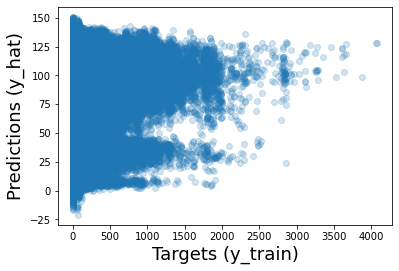

In [27]:
import matplotlib.pyplot as plt
y_hat = model.predict(X_train)
plt.scatter(y_train,y_hat,alpha = 0.2)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [28]:
X_test = test[['IntersectionId', 'Latitude', 'Longitude', 'EntryHeading',
       'ExitHeading', 'Hour', 'Weekend', 'Month','Boston','Chicago','Philadelphia','Atlanta']]
y_test = model.predict(X_test)

In [29]:
y_test.shape

(1921357, 6)

In [30]:
X_test.shape

(1921357, 12)

In [31]:
tid = test['RowId'].astype(str)+'_'
tid


0                0_
1                1_
2                2_
3                3_
4                4_
             ...   
1921352    1921352_
1921353    1921353_
1921354    1921354_
1921355    1921355_
1921356    1921356_
Name: RowId, Length: 1921357, dtype: object

In [32]:
sample

,TargetId,Target
0,0_0,0
1,0_1,0
2,0_2,0
3,0_3,0
4,0_4,0
...,...,...
11522005,1920334_1,0
11522006,1920334_2,0
11522007,1920334_3,0
11522008,1920334_4,0


In [33]:
sub_model = pd.DataFrame()
sub_id = []
for i in tid:
    if i=="1920335_":
        break
    sub_id.append(i+'0')
    sub_id.append(i+'1')
    sub_id.append(i+'2')
    sub_id.append(i+'3')
    sub_id.append(i+'4')
    sub_id.append(i+'5')
sub_model['TargetId'] = sub_id
sub_model

,TargetId
0,0_0
1,0_1
2,0_2
3,0_3
4,0_4
...,...
11522005,1920334_1
11522006,1920334_2
11522007,1920334_3
11522008,1920334_4


In [34]:
y_test

array([[ 1.76200181,  5.70852202,  8.97725007, 27.38529214, 26.81702171,
        94.09565628],
       [ 1.91222721,  5.94084791,  9.46776527, 28.30241115, 27.68012281,
        96.46158208],
       [ 1.93352649,  6.07230501,  9.541577  , 28.67027066, 27.84411449,
        97.04646298],
       ...,
       [ 0.97032069,  4.70599146,  4.31247547, 22.1104309 , 15.56375899,
        73.11704974],
       [ 0.94902141,  4.57453435,  4.23866374, 21.74257138, 15.39976731,
        72.53216884],
       [ 0.98309611,  4.68612522,  4.35984682, 22.14958858, 15.69529357,
        73.58683024]])

In [35]:
y_test = y_test.flatten()
np.transpose(y_test)
y_test.shape,sub_model.shape

((11528142,), (11522010, 1))

In [36]:
y_test=y_test[:11522010,]
y_test.shape

(11522010,)

In [37]:
sub_model['Target'] = y_test
sub_model

,TargetId,Target
0,0_0,1.762002
1,0_1,5.708522
2,0_2,8.977250
3,0_3,27.385292
4,0_4,26.817022
...,...,...
11522005,1920334_1,5.611509
11522006,1920334_2,4.111146
11522007,1920334_3,23.666201
11522008,1920334_4,14.312090


In [38]:
sub_model.to_csv('linear_reg.csv',index=False)